In [13]:
def transform_pca(filter, embed_dim, patch_size):
    from sklearn.decomposition import PCA
    # from sklearn.preprocessing import StandardScaler
    # sc = StandardScaler()
    pca = PCA()

    filter = torch.reshape(filter, (embed_dim, -1))
    filter = torch.transpose(filter, 0, 1)
    # filter = sc.fit_transform(filter)
    filter = pca.fit_transform(filter)
    filter = torch.from_numpy(filter)
    filter = torch.transpose(filter, 0, 1)
    filter = torch.reshape(filter, (embed_dim, 3, patch_size, patch_size))

    return filter


def filter_visualization(tensor, name, nrow=7, padding=1):
    import torchvision
    import matplotlib.pyplot as plt
    print(tensor.shape)

    rows = tensor.shape[0] // nrow + 1 
    grid = torchvision.utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)  # c, h, w
    print(grid.shape)
    plt.figure(figsize=(nrow*1.5, rows*1.5))
    plt.title('Linear embedding weights \n(first 28 principal components)\n' + name)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))  # h, w, c



In [14]:
#load model

from mlp_mixer import * 
import json

path = "./models/20220314-162951/"
path = "./models/20220401-122435/"
with open(path+'out_hyperparams.json') as json_file:
    params = json.load(json_file)

print(params)

image_width_height = params['image_width_and_height'] #da cambiare a seconda della dimensione dell'immagine
patch_dims = params['patch_width_and_height']
# variable_name = value #paper value
n_channels = params['hidden_dim_size (n_channels)'] #10 #512
num_layers = params['number_of_layers'] #3
mlp_dc_dimension = params['mlp_dc_dimension'] #8 #2048 # dc è la dimensione del channel mixing (l'ultimo mlp)
mlp_ds_dimension = params['mlp_ds_dimension'] #8 #256 # ds è la dimensione del token mixing (il primo)

model = MLP_mixer(img_h_w=image_width_height, patch_dim=patch_dims, n_channels=n_channels, num_mixers_layers=num_layers,
    hidden_dim_mlp_token=mlp_ds_dimension, hidden_dim_mlp_channel=mlp_dc_dimension)

#model.load_state_dict(torch.load(path+"final.pth"))
#model.load_state_dict(torch.load(path+"checkpoint_epch_.pth"))
model.load_state_dict(torch.load(path+"1finetune_checkpoint_epch_10.pth"))
model.eval()

{'dataset': '-', 'rand_augm_numops': 3, 'rand_augm_magnitude': 15, 'comment': 'added weight decay', 'train_size': 626, 'validation_size': 25, 'learning_rate': 0.001, 'epochs': 500, 'steps': 626, 'batch_size': 2048, 'mixup_alpha': -1, 'weight_decay': 0.1, 'image_width_and_height': 64, 'patch_width_and_height': 8, 'hidden_dim_size (n_channels)': 128, 'number_of_layers': 8, 'mlp_dc_dimension': 512, 'mlp_ds_dimension': 64}


MLP_mixer(
  (patch_embedder): Conv2d(3, 128, kernel_size=(8, 8), stride=(8, 8))
  (mixerlayers): ModuleList(
    (0): MixerLayer(
      (layer_norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (layer_norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (MLP1): MLP(
        (linear_gelu_stack): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): GELU()
          (2): Linear(in_features=64, out_features=64, bias=True)
        )
      )
      (MLP2): MLP(
        (linear_gelu_stack): Sequential(
          (0): Linear(in_features=128, out_features=512, bias=True)
          (1): GELU()
          (2): Linear(in_features=512, out_features=128, bias=True)
        )
      )
    )
    (1): MixerLayer(
      (layer_norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (layer_norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (MLP1): MLP(
        (linear_gelu_stack): Sequential(
          (0):

In [15]:
filter.shape

torch.Size([128, 3, 8, 8])

torch.Size([28, 3, 8, 8])
torch.Size([3, 37, 64])


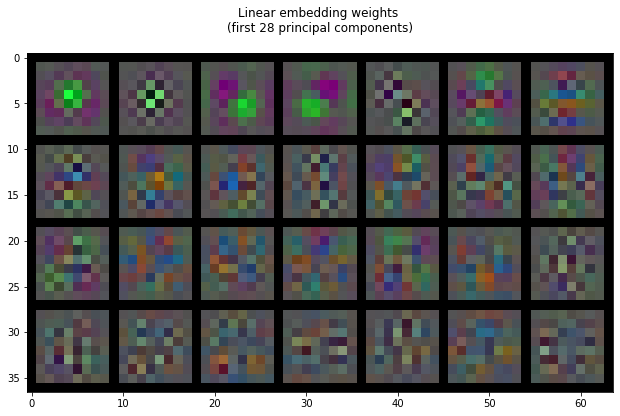

In [16]:

# position embeddings plot
import torch.nn.functional as F
import torch

#block0 = model.mixerlayers[mix_layer].MLP1.linear_gelu_stack[0].weight.detach().numpy()
filter = model.patch_embedder.weight.cpu().detach()
#filter = patch_embed.linear_embedding.weight.cpu().detach()  # (embed_dim, patch_size^2 * in_chans)
filter = transform_pca(filter, embed_dim=n_channels, patch_size=patch_dims)
# embed_dim, c, patch_size, patch_size
filter_visualization(filter[0:28], name = '')

